# **FINAL TASK VIX DATA SCIENCE ID/X PARTNERS CREDIT LOAN PREDICTION**

#### **Summary**

This is the final task of VIX Data Scientist ID/X Partners. In this task, as a Data Scientist intern, the intern has responsibility to solve client's problem. This problem comes from a lending company client which asking for help to make a credit loan prediction to give them more insight about the behaviour of the borrowers.

In [ ]:
#import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load data
df = pd.read_csv('/content/drive/MyDrive/VIX_DS_ID-X_Partners/FinalTask/loan_data_2007_2014.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Shape of Loan Dataset: ", df.shape)

Shape of Loan Dataset:  (466285, 75)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
#check missing value
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [ ]:
#drop all empty columns
df.dropna(how='all', axis=1, inplace=True)

#drop unused cols
df.drop(['Unnamed: 0','policy_code'],axis=1, inplace=True)

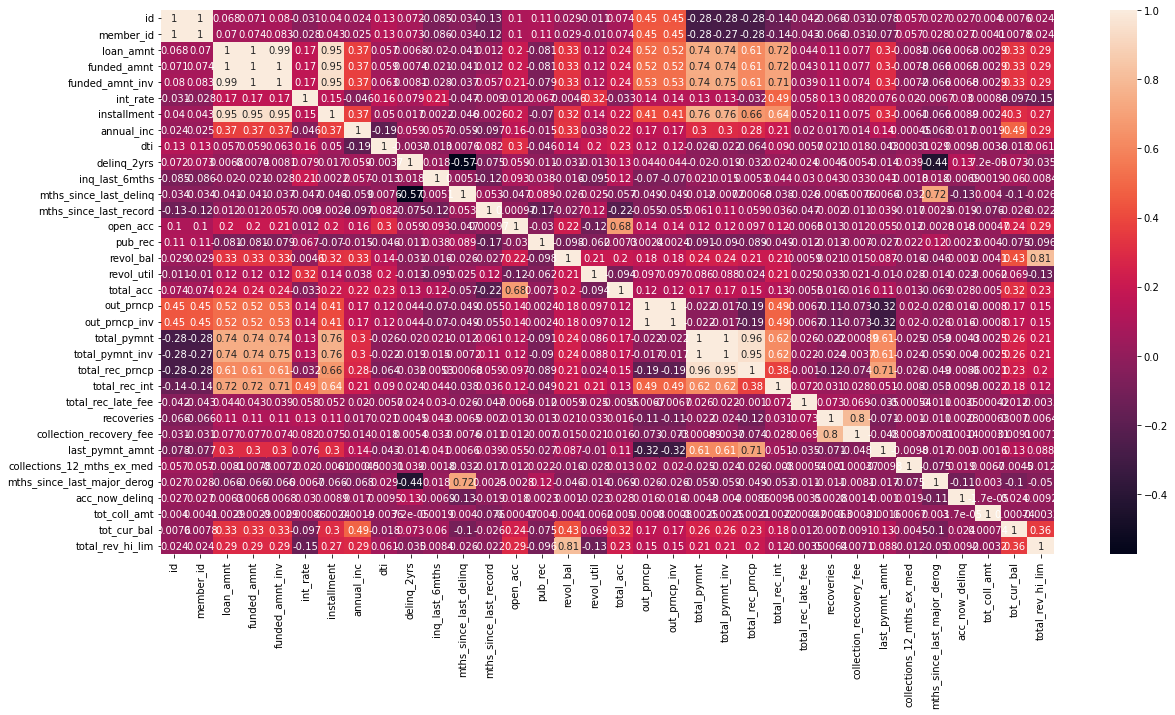

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

The columns that possibly related:

*   Income (annual_inc)
*   Borrower's Job (emp_title)
*   Home ownership (home_ownership)
*   Employement length (emp_length)
*   Debt-To-Income Ratio (dti)
*   Loan Intent (purpose)
*   Loan grade (grade)
*   Loan amount (loan_amnt)
*   Interest rate (int_rate)
*   Loan status (loan_status)



In [ ]:
#subset some related columns and store to new dataframe 'data'
data = df[['emp_title','addr_state','annual_inc','home_ownership',
           'emp_length','dti','grade','loan_amnt','issue_d',
           'loan_status','int_rate','term','purpose']]

In [ ]:
data.head(10)

,emp_title,addr_state,annual_inc,home_ownership,emp_length,dti,grade,loan_amnt,issue_d,loan_status,int_rate,term,purpose
0,NaN,AZ,24000.0,RENT,10+ years,27.65,B,5000,Dec-11,Fully Paid,10.65,36 months,credit_card
1,Ryder,GA,30000.0,RENT,< 1 year,1.00,C,2500,Dec-11,Charged Off,15.27,60 months,car
2,NaN,IL,12252.0,RENT,10+ years,8.72,C,2400,Dec-11,Fully Paid,15.96,36 months,small_business
3,AIR RESOURCES BOARD,CA,49200.0,RENT,10+ years,20.00,C,10000,Dec-11,Fully Paid,13.49,36 months,other
4,University Medical Group,OR,80000.0,RENT,1 year,17.94,B,3000,Dec-11,Current,12.69,60 months,other
5,Veolia Transportaton,AZ,36000.0,RENT,3 years,11.20,A,5000,Dec-11,Fully Paid,7.90,36 months,wedding
6,Southern Star Photography,NC,47004.0,RENT,8 years,23.51,C,7000,Dec-11,Current,15.96,60 months,debt_consolidation
7,MKC Accounting,CA,48000.0,RENT,9 years,5.35,E,3000,Dec-11,Fully Paid,18.64,36 months,car
8,NaN,CA,40000.0,OWN,4 years,5.55,F,5600,Dec-11,Charged Off,21.28,60 months,small_business
9,Starbucks,TX,15000.0,RENT,< 1 year,18.08,B,5375,Dec-11,Charged Off,12.69,60 months,other


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   emp_title       438697 non-null  object 
 1   addr_state      466285 non-null  object 
 2   annual_inc      466281 non-null  float64
 3   home_ownership  466285 non-null  object 
 4   emp_length      445277 non-null  object 
 5   dti             466285 non-null  float64
 6   grade           466285 non-null  object 
 7   loan_amnt       466285 non-null  int64  
 8   issue_d         466285 non-null  object 
 9   loan_status     466285 non-null  object 
 10  int_rate        466285 non-null  float64
 11  term            466285 non-null  object 
 12  purpose         466285 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 46.2+ MB


### **Data Preprocessing**

In [ ]:
data.isnull().sum()

emp_title         27588
addr_state            0
annual_inc            4
home_ownership        0
emp_length        21008
dti                   0
grade                 0
loan_amnt             0
issue_d               0
loan_status           0
int_rate              0
term                  0
purpose               0
dtype: int64

Found columns with missing value (NaN) value in emp_title, annual_inc, and emp_length. First, let's do missing value on each column.

#### 1. emp_title column



In [ ]:
# count each value in emp_title
data.emp_title.value_counts().head(20)

Teacher                     5399
Manager                     4438
Registered Nurse            2316
RN                          2204
Supervisor                  1967
Project Manager             1624
Sales                       1624
Owner                       1527
Office Manager              1395
manager                     1312
Driver                      1296
General Manager             1263
Director                    1187
teacher                     1182
Engineer                    1049
driver                       967
Vice President               944
President                    915
owner                        856
Administrative Assistant     840
Name: emp_title, dtype: int64

besides from the NaN value, found that there are some duplicate value because different string format i.e. above 'Teacher' and 'teacher' are counted as different value and so for the 'Manager' and 'manager' and so on. So, to handle them, let's do:
*   Transform all the string format to lowercase (handling duplicates data)
*   Replace the NaN value with 'unknown'



In [ ]:
# transform the value in emp_title lowercase to drop duplicate data
data['emp_title'] = data['emp_title'].str.lower()
#fill the NaN value in 'emp_title' cols with unknown
data['emp_title']=data['emp_title'].fillna('unknown')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#check after the cleaning and manipulation step 
data.emp_title.value_counts().head(20)

unknown               27588
teacher                6663
manager                6005
registered nurse       3278
supervisor             2857
owner                  2485
rn                     2472
sales                  2449
driver                 2352
project manager        1891
office manager         1861
general manager        1694
truck driver           1472
director               1289
engineer               1284
police officer         1123
president              1095
store manager          1076
vice president         1059
operations manager     1041
Name: emp_title, dtype: int64

#### 1. emp_length column

In [ ]:
#check the value in emp_length
data.emp_length.value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

Almost similar with previous column, besides the NaN missing value, there are some value which a little bit different from other '10+ years' and '< 1 year'. First, we need to do some string manipulation.

In [ ]:
#transform the value of '10+ years' as 10 and 0 for '< 1 year'
data = data.replace({'emp_length' : {'10+ years' : '10', '< 1 year' : '0'}})

# remove the ' year' and 'years'
data['emp_length'] = data['emp_length'].str.rstrip(' years')
data['emp_length'] = data['emp_length'].str.rstrip(' year')

In [ ]:
#replace NaN value with the mode 
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])

#convert the 'emp_length' data format from object to int
data['emp_length'] = data['emp_length'].astype(int)

#### 3. annual_inc column

In [ ]:
#fill the annual_inc missing value with mean of data
data['annual_inc'] = data['annual_inc'].fillna(data['annual_inc'].mean())

In [ ]:
#check for final null values
data.isnull().sum()

emp_title         0
addr_state        0
annual_inc        0
home_ownership    0
emp_length        0
dti               0
grade             0
loan_amnt         0
issue_d           0
loan_status       0
int_rate          0
term              0
purpose           0
dtype: int64

In [ ]:
data.describe()

,annual_inc,emp_length,dti,loan_amnt,int_rate
count,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000
mean,7.327738e+04,6.173846,17.218758,14317.277577,13.829236
std,5.496333e+04,3.640525,7.851121,8286.509164,4.357587
min,1.896000e+03,0.000000,0.000000,500.000000,5.420000
25%,4.500000e+04,3.000000,11.360000,8000.000000,10.990000
50%,6.300000e+04,7.000000,16.870000,12000.000000,13.660000
75%,8.895300e+04,10.000000,22.780000,20000.000000,16.490000
max,7.500000e+06,10.000000,39.990000,35000.000000,26.060000


### **Exploratory Data Analysis**

In [ ]:
data['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [ ]:
#transform NONE and ANY to OTHER to reduce the category
data = data.replace(to_replace=["NONE","ANY"],value="OTHER")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


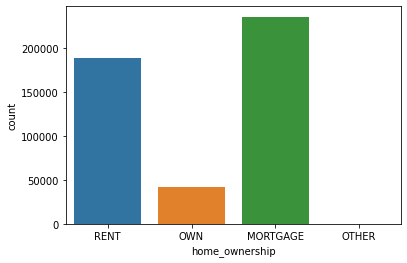

In [ ]:
#visualize into plot
sns.countplot('home_ownership',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


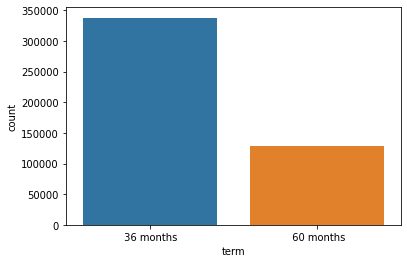

In [ ]:
#check the proportion of loan's term
sns.countplot('term',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


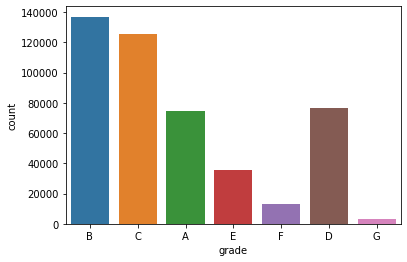

In [ ]:
sns.countplot('grade',data=data)

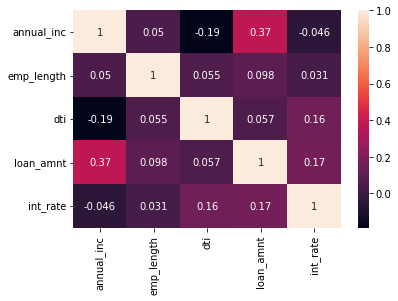

In [ ]:
sns.heatmap(data.corr(),annot=True)

Conclusion:

*   Most of borrower's home ownership is mortgage
*   Term of loan borrower's choose is 36 months
*   The type of loan most picked is grade B





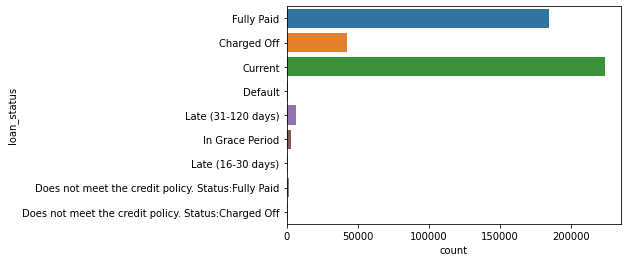

In [ ]:
#check for borrower's loan status
sns.countplot(y='loan_status',data=data)

In [ ]:
# detail number of each status
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

We can see, there are lot of loan status. Because the loan_status will be chosen as target and need to be labelled by encode it, so it will be grouped into 3 class : Good, Neutral, Bad
*   Good = Fully Paid, Does not meet the credit policy. Status:Fully Paid
*   Neutral = Default, Current, In Grace Period
*   Bad = Late (16-30 days), Late (31-120 days),Charged Off, Does not meet the credit policy. Status:Charged Off


In [ ]:
# decrease the category for label
# replace value as defined class above by replacing the value
data = data.replace(dict.fromkeys(['Fully Paid','Does not meet the credit policy. Status:Fully Paid'], 'Good'))
data = data.replace(dict.fromkeys(['Default', 'Current', 'In Grace Period'], 'Neutral'))
data = data.replace(dict.fromkeys(['Late (16-30 days)', 'Late (31-120 days)','Charged Off', 'Does not meet the credit policy. Status:Charged Off'], 'Bad'))

In [ ]:
data['loan_status'].value_counts()

Neutral    228204
Good       186727
Bad         51354
Name: loan_status, dtype: int64

In [ ]:
#final check
data.head()

,emp_title,addr_state,annual_inc,home_ownership,emp_length,dti,grade,loan_amnt,issue_d,loan_status,int_rate,term,purpose
0,unknown,AZ,24000.0,RENT,10,27.65,B,5000,Dec-11,Good,10.65,36 months,credit_card
1,ryder,GA,30000.0,RENT,0,1.00,C,2500,Dec-11,Bad,15.27,60 months,car
2,unknown,IL,12252.0,RENT,10,8.72,C,2400,Dec-11,Good,15.96,36 months,small_business
3,air resources board,CA,49200.0,RENT,10,20.00,C,10000,Dec-11,Good,13.49,36 months,other
4,university medical group,OR,80000.0,RENT,1,17.94,B,3000,Dec-11,Neutral,12.69,60 months,other


In [ ]:
data.purpose.value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

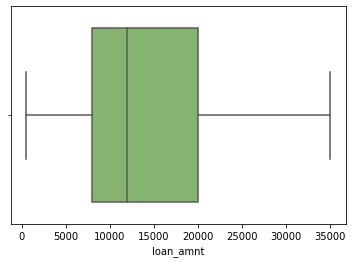

In [ ]:
sns.boxplot(x = "loan_amnt", data = data, palette = 'summer')

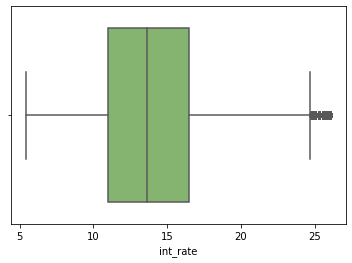

In [ ]:
sns.boxplot(x = "int_rate", data = data, palette = 'summer')

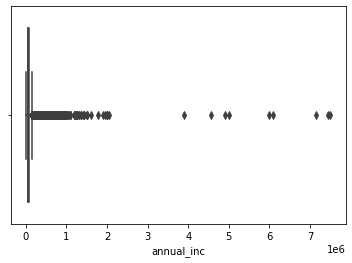

In [ ]:
sns.boxplot(x = "annual_inc", data = data)

### **MODELLING**

In [38]:
#import lib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [39]:
#label encoding
lenc = LabelEncoder()

#transform categorical data
data['home_ownership'] = lenc.fit_transform(data['home_ownership'])
data['loan_status'] = lenc.fit_transform(data['loan_status'])
data['term'] = lenc.fit_transform(data['term'])
data['grade'] = lenc.fit_transform(data['grade'])

In [ ]:
# define X and y var
X = data.drop(['emp_title','addr_state','issue_d','purpose'], axis=1)
y = data['loan_status']

#split X and y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#define model
logreg = LogisticRegression()

#fit the train test
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
#predict the test data
y_pred = logreg.predict(X_test)

In [43]:
#check the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.5294401492649345


In [44]:
#print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     10254
           1       0.50      0.29      0.37     37283
           2       0.54      0.84      0.66     45720

    accuracy                           0.53     93257
   macro avg       0.68      0.38      0.34     93257
weighted avg       0.57      0.53      0.47     93257

